# Descarga de históricos de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Entonces, en la clase anterior vimos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> Estas medidas se pueden calcular cuando tenemos escenarios probables de la economía y conocemos sus probabilidades de ocurrencia. Ahora, si no conocemos dichos escenarios, ¿qué podemos hacer?

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [14]:
# Importamos pandas
import pandas as pd
%matplotlib inline

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [15]:
# Función read_csv


In [16]:
# Cargamos hoja de calculo en un dataframe


#### Anotación #1
- Quisieramos indizar por fecha.

In [17]:
# Cargamos hoja de calculo en un dataframe
closes = pd.read_csv('precios/AAPL.csv',index_col='Date')
closes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500


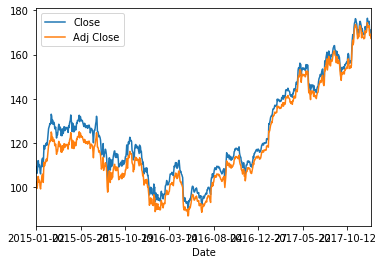

In [18]:
# Graficar precios de cierre y precios de cierre ajustados
closes[['Close','Adj Close']].plot()

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [20]:
# Cargamos hoja de calculo en un dataframe
closes=pd.read_csv('precios/AAPL.csv',
                  index_col='Date',
                  usecols=['Date','Adj Close'])
closes


,Adj Close
Date,
2015-01-02,102.319397
2015-01-05,99.436890
2015-01-06,99.446251
2015-01-07,100.840714
2015-01-08,104.715256
...,...
2017-12-22,173.023026
2017-12-26,168.633423
2017-12-27,168.663101


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,GFNORTEO.MX,GFINBURO.MX) y contengan los datos de precio de cierre.

In [26]:
aapl = pd.read_csv('precios/AAPL.csv', index_col='Date',usecols=['Date','Adj Close'])
amzn = pd.read_csv('precios/AMZN.csv', index_col='Date',usecols=['Date','Adj Close'])
nflx = pd.read_csv('precios/NFLX.csv', index_col='Date',usecols=['Date','Adj Close'])
tsla = pd.read_csv('precios/TSLA.csv', index_col='Date',usecols=['Date','Adj Close'])

FileNotFoundError: [Errno 2] File b'precios/NFLX.csv' does not exist: b'precios/NFLX.csv'

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web


El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [7]:
# Función DataReader


- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: necesita registrarse para obtener un api key.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [8]:
# Ejemplo google finance


In [9]:
# Ejemplo iex


In [10]:
# Ejemplo yahoo


Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [8]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [11]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'


In [12]:
# Gráfico


**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

### ¡Oh, si!

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>